## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Correlation Check

In [3]:
correlations = data.corr()
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [22]:
data.iloc[:,0].values

array([ 6,  1,  8,  1,  0,  5,  3, 10,  2,  4, 10, 10,  1,  5,  7,  0,  7,
        1,  1,  3,  8,  7,  9, 11, 10,  7,  1, 13,  5,  5,  3,  3,  6, 10,
        4, 11,  9,  2,  4,  3,  7,  7,  9,  7,  0,  1,  2,  7,  1,  1,  5,
        8,  7,  1,  7,  0,  0,  0,  8,  5,  2,  7,  5,  0,  2,  1,  4,  2,
        5, 13,  4,  1,  7,  5,  0,  2,  3,  7,  0,  5,  2, 13,  2, 15,  1,
        1,  4,  7,  4,  2,  6,  2,  1,  6,  1,  1,  1,  0,  1,  2,  1,  1,
        4,  3,  0,  3,  8,  1,  4,  7,  4,  5,  5,  4,  4,  0,  6,  2,  5,
        0,  1,  3,  1,  1,  0,  4,  9,  3,  8,  2,  2,  0,  0,  0,  5,  3,
        5,  2, 10,  4,  9,  2,  5,  2,  1,  4,  9,  1,  8,  7,  2,  1,  2,
       17,  4,  7,  0,  2,  0,  6,  3,  4,  4,  3,  6,  6,  2,  1,  2,  8,
        6,  0,  5,  5,  6,  0,  5,  4,  7,  8,  1,  8,  5,  3,  9,  7, 11,
        8,  5,  1,  3,  4,  4,  0,  1,  0,  2,  6,  5,  8,  5,  1,  7,  2,
        0,  7,  0,  9, 12,  5,  6,  5,  5,  0,  2,  7,  7,  1,  1,  0,  3,
        4,  0,  4,  6,  1

## Visualizing the data for any Relations

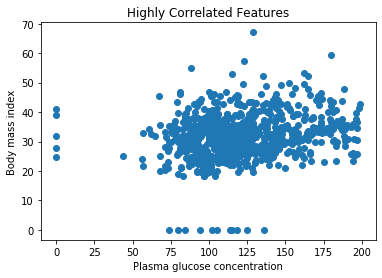

In [4]:
def visualise(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(data)

## Replacing the Zeros with Null values

In [5]:
data[['Glucose','BMI']] = data[['Glucose','BMI']].replace(0, np.NaN)
data.dropna(inplace=True)

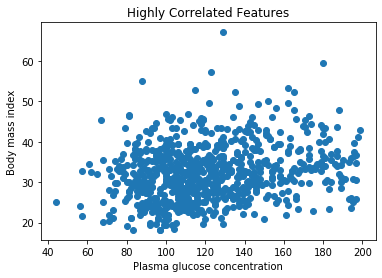

In [6]:
visualise(data)

## Feature Selection

In [8]:
X = data[['Glucose','BMI','Pregnancies','BloodPressure','SkinThickness','Insulin',
          'DiabetesPedigreeFunction','Age']].values
y = data[['Outcome']].values

## Standardization & Scaling of Features

In [9]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [11]:
print(X[0:10,:])

[[ 0.85211873  0.16540919  0.63710986  0.1253525   0.89727837 -0.70219989
   0.46667123  1.42608616]
 [-1.2079944  -0.84552075 -0.84527447 -0.20233607  0.52039138 -0.70219989
  -0.36997511 -0.19762243]
 [ 1.99662603 -1.322102    1.2300636  -0.31156559 -1.30122904 -0.70219989
   0.60308096 -0.11216408]
 [-1.07719357 -0.62889291 -0.84527447 -0.20233607  0.1435044   0.10920865
  -0.92773934 -1.05220589]
 [ 0.49241644  1.53738552 -1.14175134 -1.62231987  0.89727837  0.74797707
   5.5017059  -0.02670573]
 [-0.19428794 -0.98993931  0.340633    0.23458202 -1.30122904 -0.70219989
  -0.82467421 -0.28308077]
 [-1.43689586 -0.21007908 -0.25232074 -1.07617225  0.70883487  0.05741661
  -0.68220183 -0.62491416]
 [-0.22698815  0.41092074  1.82301733 -3.80691032 -1.30122904 -0.70219989
  -1.02777314 -0.36853912]
 [ 2.45442895 -0.28228836 -0.5487976   0.01612297  1.52542334  3.98497922
  -0.95502128  1.6824612 ]
 [-0.39048919  0.74308343  0.04415613  1.21764772 -1.30122904 -0.70219989
  -0.85498748 -0.

## Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Logistic Regression Model

In [50]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions

In [51]:
y_pred=logreg.predict(X_test)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [53]:
logreg.coef_

array([[ 1.09037806,  0.63617673,  0.41624468, -0.18883202, -0.05648427,
        -0.1256218 ,  0.30466581,  0.18003675]])

In [54]:
logreg.intercept_

array([-0.76912465])

## Performance & Accuracy

In [55]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[90, 14],
       [17, 30]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

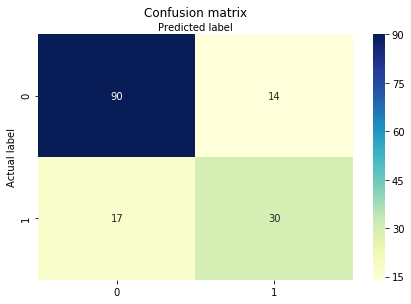

In [56]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7947019867549668
Precision: 0.6818181818181818
Recall: 0.6382978723404256


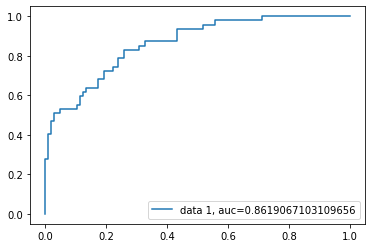

In [58]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()